In [79]:
import numpy as np
import matplotlib.pyplot as plt

### Ordinary Least Squares Linear Regression

In [206]:
class linear_regression_ols(object):
    def __init__(self):
        self.w = None
        
    def preprocess(self,x,y=None):
        if len(x.shape) == 1:
            x = x.reshape(-1,1)
        x = np.concatenate([np.ones(x.shape[0]).reshape(-1,1),x],axis=1)
        if y is not None:
            y = y.reshape(-1,1)
        return x,y
        
    def train(self,x,y):
        x,y = self.preprocess(x,y)
        diag = np.eye(x.shape[1])*10e-15
        self.w = np.dot(np.linalg.inv(x.T.dot(x)+diag),x.T.dot(y))
    
    def predict(self,x):
        x,_ = self.preprocess(x)
        return x.dot(self.w)
    
    def get_params(self):
        return self.w
    
    def rmse(self,y_pred,y):
        return ((1.0/y.shape[0])*np.sum((y_pred.reshape(-1,1)-y.reshape(-1,1))**2))**(0.5)

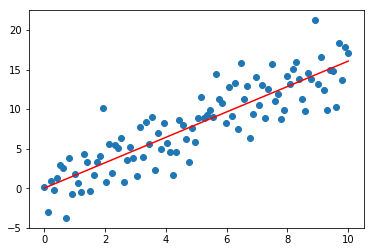

In [207]:
# deterministic test case
X = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
Y = np.array([9,10,11,12]).T

model = linear_regression_ols()
model.train(X,Y)
predictions = model.predict(X)
rmse = model.rmse(predictions,Y)
params = model.get_params()

# random variable test case
X = np.linspace(0,10,100).reshape(-1,1)
Y = X * 1.75 + np.random.normal(0,3,X.shape[0]).reshape(-1,1)

model2 = linear_regression_ols()
model2.train(X,Y)
predictions2 = model2.predict(X)
rmse2 = model2.rmse(predictions2,Y)
params2 = model2.get_params()

plt.scatter(X,Y)
plt.plot(X,predictions2,c='r')
plt.show()

### Stochastic Gradient Descent Linear Regression

In [208]:
class linear_regression_sgd(object):
    def __init__(self):
        self.w = None
        
    def preprocess(self,x,y=None):
        if len(x.shape) == 1:
            x = x.reshape(-1,1)
        x = np.concatenate([np.ones(x.shape[0]).reshape(-1,1),x],axis=1)
        if y is not None:
            y = y.reshape(-1,1)
        return x,y
    
    def get_gradient(self, w, x, y):
        y_estimate = x.dot(w).flatten()        
        error = (y.flatten() - y_estimate)        
        gradient = -(1.0/len(x)) * error.dot(x)
        return gradient.T
    
    def train(self,x,y,alpha = 0.01):
        x,y = self.preprocess(x,y)
        self.w = np.random.normal(0,10,x.shape[1])
                
        tolerance = .01
        max_epoch = 10000
        epoch = 0
        
        while True:
            gradient = self.get_gradient(self.w,x,y)
            self.w -= alpha*gradient
            epoch +=1
            if epoch % 100 == 0:
                #print("Epoch: {}".format(epoch))
                pass
            if np.sum(abs(gradient)) <= tolerance or epoch >= max_epoch:
                break
            
    def predict(self,x):
        x,_ = self.preprocess(x)
        return x.dot(self.w)
            
    def rmse(self,y_pred,y):
        return ((1.0/y.shape[0])*np.sum((y_pred.reshape(-1,1)-y.reshape(-1,1))**2))**(0.5)
        
    def get_params(self):
        return self.w

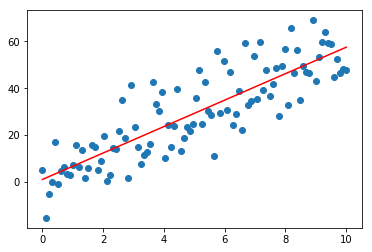

In [209]:
# deterministic test case
X = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
Y = np.array([9,10,11,12]).T

model = linear_regression_sgd()
model.train(X,Y)
predictions = model.predict(X)
rmse = model.rmse(predictions,Y)
params = model.get_params()

# random variable test case
X = np.linspace(0,10,100).reshape(-1,1)
Y = X * 5.75 + np.random.normal(0,10,X.shape[0]).reshape(-1,1)

model2 = linear_regression_sgd()
model2.train(X,Y)
predictions2 = model2.predict(X)
rmse2 = model2.rmse(predictions2,Y)
params2 = model2.get_params()

plt.scatter(X,Y)
plt.plot(X,predictions2,c='r')
plt.show()